## np.meshgrid 이해

In [1]:
import numpy as np

X, Y = np.meshgrid(
    np.arange(12, 21),   # player가 가진 카드 합계 (12~21)
    np.arange(1, 11))    # dealer가 공개한 카드 (1~10)

In [2]:
# 플레이어의 카드 합계
X

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]])

In [3]:
# 딜러의 공개 카드
Y

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]])

## np.dstack 이해

In [4]:
# (플레이어 카드합계, 딜러 공개 카드) pair 생성
print(np.dstack([X, Y]).shape)
np.dstack([X, Y])

(10, 10, 2)


array([[[12,  1],
        [13,  1],
        [14,  1],
        [15,  1],
        [16,  1],
        [17,  1],
        [18,  1],
        [19,  1],
        [20,  1],
        [21,  1]],

       [[12,  2],
        [13,  2],
        [14,  2],
        [15,  2],
        [16,  2],
        [17,  2],
        [18,  2],
        [19,  2],
        [20,  2],
        [21,  2]],

       [[12,  3],
        [13,  3],
        [14,  3],
        [15,  3],
        [16,  3],
        [17,  3],
        [18,  3],
        [19,  3],
        [20,  3],
        [21,  3]],

       [[12,  4],
        [13,  4],
        [14,  4],
        [15,  4],
        [16,  4],
        [17,  4],
        [18,  4],
        [19,  4],
        [20,  4],
        [21,  4]],

       [[12,  5],
        [13,  5],
        [14,  5],
        [15,  5],
        [16,  5],
        [17,  5],
        [18,  5],
        [19,  5],
        [20,  5],
        [21,  5]],

       [[12,  6],
        [13,  6],
        [14,  6],
        [15,  6],
        [16,  6],


## defaultdict 이해

defaultdict는 Python의 collections 모듈에서 제공하는 딕셔너리 서브클래스입니다. defaultdict는 일반적인 딕셔너리와 유사하지만, 존재하지 않는 키를 조회할 때 KeyError를 발생시키는 대신, 기본값을 반환하도록 설정할 수 있습니다. 이를 통해 코드의 간결성과 가독성을 높일 수 있습니다.  

키가 존재하지 않는 경우, defaultdict는 지정된 기본값을 자동으로 초기화하여 추가합니다. 따라서 키 존재 여부를 확인하거나 미리 초기화할 필요가 없습니다.

In [5]:
from collections import defaultdict

num_actions = 4
pi = defaultdict(lambda: np.ones(num_actions, dtype=float) / num_actions)
pi

defaultdict(<function __main__.<lambda>()>, {})

In [6]:
P = pi[0]
print(P)

[0.25 0.25 0.25 0.25]


In [7]:
# V를 defaultdict로 정의하고 임의의 값으로 초기화
V = defaultdict(float)
for player_total in range(12, 22):  # 플레이어의 카드 합계가 12에서 21인 경우
    for dealer_upcard in range(1, 11):  # 딜러의 공개 카드가 1에서 10인 경우
        V[(player_total, dealer_upcard, False)] = np.random.random()  # 사용 가능한 에이스가 없는 경우 임의의 값 할당
        V[(player_total, dealer_upcard, True)] = np.random.random()  # 사용 가능한 에이스가 있는 경우 임의의 값 할당

# 플레이어의 카드 합계와 딜러의 공개 카드를 그리드로 생성
X, Y = np.meshgrid(np.arange(12, 22), np.arange(1, 11))

# 사용 가능한 에이스가 없는 경우에 대한 가치 함수 값을 계산
# V[(player의 hand 합계, dealer 공개 카드, 사용 가능한 에이스 보유)]
no_usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], False)], 2, np.dstack([X, Y]))

# 결과 출력
print(no_usable_ace.shape)
print(no_usable_ace)

(10, 10)
[[0.6824687  0.35449611 0.33384635 0.99706715 0.79994495 0.0550042
  0.55139509 0.54587799 0.8241505  0.06126535]
 [0.05240278 0.22080728 0.94175421 0.42906802 0.63846029 0.7877615
  0.79110094 0.5126803  0.66581955 0.52643384]
 [0.98716517 0.35630275 0.67622412 0.89759417 0.2282083  0.74214511
  0.82904793 0.76775964 0.21062553 0.44319118]
 [0.0172484  0.30997673 0.04990404 0.5713465  0.07484496 0.04522025
  0.63102238 0.60586172 0.26976648 0.52872148]
 [0.78056715 0.03672349 0.67299427 0.65711263 0.894757   0.75646352
  0.13817191 0.57134412 0.31425602 0.65554498]
 [0.7499158  0.56553241 0.1721788  0.17602055 0.12794117 0.0155811
  0.53119182 0.74521438 0.29035922 0.95152811]
 [0.14191744 0.98143707 0.27967011 0.34509802 0.37733043 0.9698522
  0.95541602 0.75191637 0.55576262 0.77943687]
 [0.57157041 0.71728093 0.0913167  0.43820386 0.56432837 0.03928503
  0.92886618 0.64443989 0.84425131 0.28598201]
 [0.08369481 0.21018006 0.79094464 0.66929252 0.05130879 0.63348109
  0.401

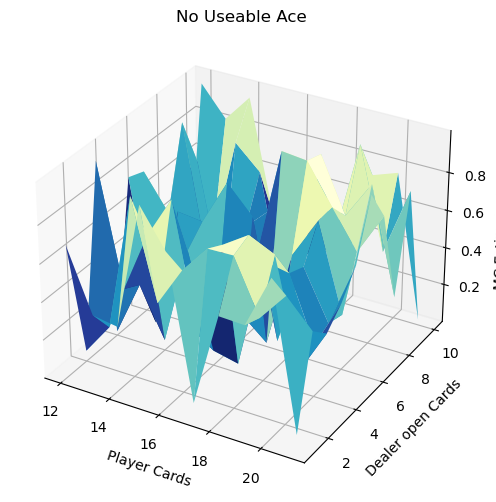

In [8]:
import matplotlib.pyplot as plt

# 3D 그래프를 위한 플롯 생성
fig, ax0 = plt.subplots(1, 1, figsize=(10, 6), subplot_kw={'projection': '3d'})

ax0.plot_surface(X, Y, no_usable_ace, cmap=plt.cm.YlGnBu_r)

ax0.set_xlabel('Player Cards') 
ax0.set_ylabel('Dealer open Cards') 
ax0.set_zlabel('MC Estimated Value') 
ax0.set_title('No Useable Ace')
plt.show()